- The key differnce between ADALINE and Percptron model is __that the weights are updated based on a linear activaion function rather than a unit step function __ like in the perceptorn model

- Cost function for ADALINE IS Sum of Squared Error __(SSE)__
- The ___weight updated is calculated using all the samples in the training set___(instead of updating weights incrementally after each sample as in perceptron model) , which is why this approach is called __batch gradient descent__

![Adaline.png](adaline.png)

In [7]:
# coding: utf-8
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
# %% matplotlib inline

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

In [6]:
from AdalineGD import AdalineGD

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

In [114]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)

In [115]:
ax[0,0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('log(Sum-Squared-error)')
ax[0,0].set_title('Adaline - Learning rate 0.01')

In [116]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

In [117]:
ax[0,1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Sum-Squared-error')
ax[0,1].set_title('Adaline - Learning rate 0.0001')

In [118]:
ada3 = AdalineGD(n_iter=10, eta=0.001).fit(X,y)

In [119]:
ax[1,0].plot(range(1, len(ada3.cost_) + 1),
          ada3.cost_, marker='o')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Sum-Squared-error')
ax[1,0].set_title('Adaline - Learning rate 0.001')

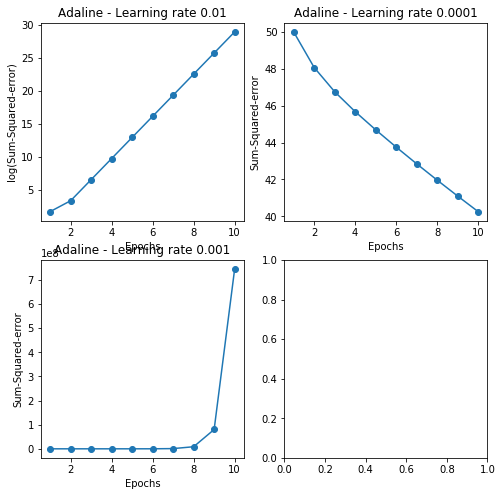

In [120]:
plt.show()

- Many machine learning algorithms require __feature scaling__ for __optimal performance.__
- _Gradeient descent_ is one of the algorithms that benefits from __feature scaliing__
- One of the reason why _standarization_ help gradient descent is that the optimizer has to go through fewer steps to find a good or optimal solution

In [123]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - np.mean(X[:,0])) / np.std(X[:,0])
X_std[:,1] = (X_std[:,1] - X[:,1].mean()) / X[:,1].std()

In [124]:
ada = AdalineGD(n_iter=15, eta=0.01).fit(X,y)

In [125]:
ada.fit(X_std,y)

In [136]:
from matplotlib.colors import ListedColormap

In [132]:
from utilities import plot_decision_regions


In [139]:
from imp import reload
reload(utilities)

<module 'utilities' from '/home/amit/Documents/ML/python_ML_RASCHKA/chap2/utilities.py'>

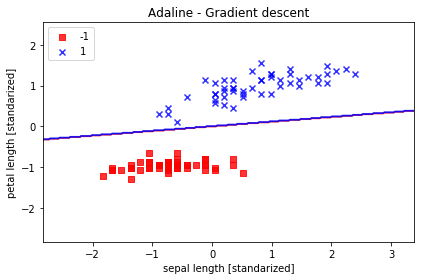

In [152]:
utilities.plot_decision_regions(X_std,y, classifier=ada)

plt.title('Adaline - Gradient descent')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

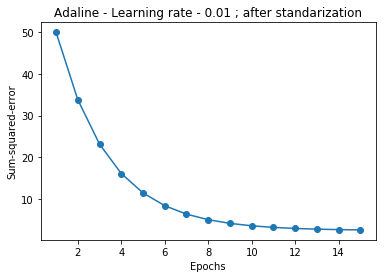

In [153]:
plt.plot(range(1, len(ada.cost_) +1), ada.cost_, marker='o')
plt.title('Adaline - Learning rate - 0.01 ; after standarization')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

- We can observe that the adaline has converged now (after standarization) using a learning rate = 0.01, where as before  statandarization cost was increasing after each epoch .

__Stochastoc gradient descent__ I
- Instead of updating the weight based on the sum of the accumulated errors over all samples.
- _we update the WEIGHTS incrementally on each training examples_
- It can be considered as appromiation of _gradient descent_ , 
- It __converges faster__ because of _frequent weight updates_

To obtain satisfying results wiht SGD, it is important to prevent it training data in random order, we need to shuffle the training set for every epoch to prevent cycles.



In [174]:
from AdalineSGD import AdalineSGD

In [173]:
import AdalineSGD
reload(AdalineSGD)

<module 'AdalineSGD' from '/home/amit/Documents/ML/python_ML_RASCHKA/chap2/AdalineSGD.py'>

In [175]:

ada = AdalineSGD(n_iter=15, eta=0.01, shuffle=True, random_state= 1)

In [176]:
ada.fit(X_std, y)

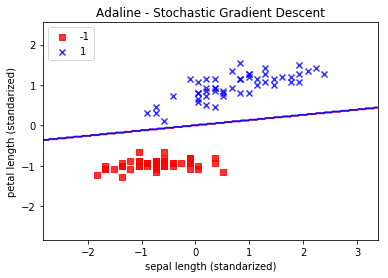

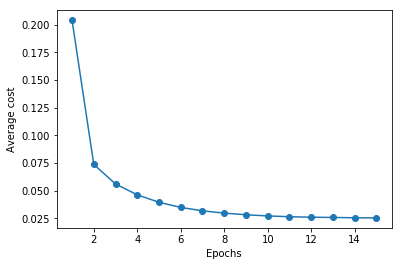

In [177]:
plot_decision_regions(X_std,y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length (standarized)')
plt.ylabel('petal length (standarized)')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.show()

- If we want to update our model, for example , in an __online learning__ scenario with streaming data, we could simply call __partial_fit()__ method on individual samples -- for instance 
                                  ada.partial_fit(X_std[:,0] ,y[0])